In [21]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [25]:
#Change the Categorical data using ordinal encoding
df.loc[df['smoking_status'] == 'formerly smoked','smoking_status'] = 1.0
df.loc[df['smoking_status'] == 'never smoked','smoking_status'] = 0.0
df.loc[df['smoking_status'] == 'smokes','smoking_status'] = 2.0
df.loc[df['smoking_status'] == 'Unknown','smoking_status'] = 1.5


df.loc[df['work_type'] == 'Private','work_type'] = 3
df.loc[df['work_type'] == 'Self-employed','work_type'] = 1
df.loc[df['work_type'] == 'Govt_job','work_type'] = 2
df.loc[df['work_type'] == 'children','work_type'] = 0
df.loc[df['work_type'] == 'Never_worked','work_type'] = 0

df.loc[df['Residence_type'] == 'Urban','Residence_type'] = 2
df.loc[df['Residence_type'] == 'Rural','Residence_type'] = 1

In [26]:
#Change the Categorical data using one hot encoding
df['male'] = 0
df['female'] = 0
df.loc[df['gender'] == 'Male','male'] = 1
df.loc[df['gender'] == 'Female','female'] = 1

df['married'] = 0
df['not_married'] = 0
df.loc[df['ever_married'] == 'Yes','married'] = 1
df.loc[df['ever_married'] == 'No','not_married'] = 1

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,male,female,married,not_married
0,9046,Male,67.0,0,1,Yes,3,2,228.69,36.600000,1.0,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,1,1,202.21,28.893237,0.0,1,0,1,1,0
2,31112,Male,80.0,0,1,Yes,3,1,105.92,32.500000,0.0,1,1,0,1,0
3,60182,Female,49.0,0,0,Yes,3,2,171.23,34.400000,2.0,1,0,1,1,0
4,1665,Female,79.0,1,0,Yes,1,1,174.12,24.000000,0.0,1,0,1,1,0


In [28]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'male', 'female', 'married', 'not_married'],
      dtype='object')

In [29]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
male                   int64
female                 int64
married                int64
not_married            int64
dtype: object

In [30]:
#remove rows withs missing values
df = df.dropna()

In [31]:
X = df.drop(columns=['id','gender','ever_married'])
Y = df['stroke']
Y = Y.ravel()

In [32]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [33]:
model = LogisticRegression(solver='liblinear', random_state=0)
result = model.fit(x_train,y_train)

In [34]:
y_pred = model.predict(x_test)

In [35]:
accuracy = sklearn.metrics.accuracy_score(y_test,y_pred)
accuracy_percentage = 100 * accuracy
accuracy

1.0

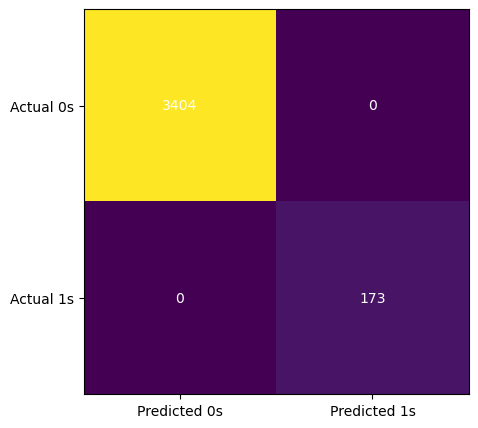

In [36]:
cm = confusion_matrix(y_train, model.predict(x_train))

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [37]:
print(classification_report(y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3404
           1       1.00      1.00      1.00       173

    accuracy                           1.00      3577
   macro avg       1.00      1.00      1.00      3577
weighted avg       1.00      1.00      1.00      3577



In [38]:
#save the model
# import pickle

# filename = 'final_model.pkl'
# pickle.dump(model, open(filename, 'wb'))

In [39]:
#load the model
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(x_test, y_test)
# print(result)